## P3.1 Metoda Eulera

- Zaprogramować metodę Eulera (wzór jawny i wsteczny), a następnie zastosować ją do równania $ y' = 1 − 2t + 4y $.
- Rozwiązać zagadnienie początkowe $y(0) = 1$ w przedziale $t \in [0, 2]$. 
- Jakim wzorem wyraża się rozwiązanie dokładne? 
- Znaleźć rozwiązanie przybliżone za pomoca obu wariantów metody Eulera.
- Skomentować wyniki.

In [1]:
%matplotlib inline
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

symbols = sp.symbols('yp y t')
yp, y, t = symbols
equation = sp.Eq(yp, 1 - 2*t + 4*y)
rng = (0,2)
y0 = 1
h = 0.005

#### Rozwiązanie dokładne: 
$ y' = 1 − 2t + 4y $

$ y(0) = 1 $


$ y(t) = \frac{1}{8} (4t + 9e^{4t} - 1) $

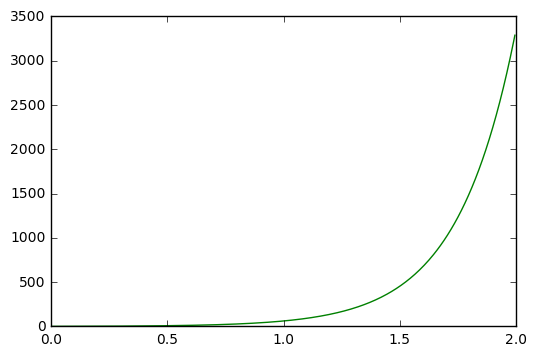

In [2]:
t0, tn = rng
t_exact = np.arange(t0,tn,h)
y_exact = (4*t_exact+9*np.e**(4*t_exact)-1)/8

plt.plot(t_exact, y_exact, 'g')
plt.show()

#### Metoda Eulera (wzór jawny): 
$ y_{k+1} = y_k + h\cdot f(t_k, y_k) $

$ y_0 = y(t_0) $

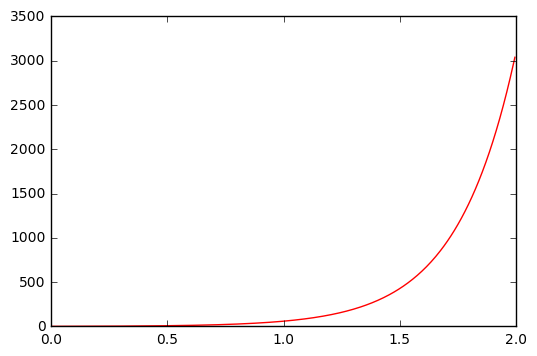

In [3]:
def euler_method(equation, symbols, y0, rng, h):
    yp_sym, y_sym, t_sym = symbols
    t0, tn = rng
    
    f = sp.solve(equation, yp_sym)[0]
    
    t = np.arange(t0,tn,h)
    y = np.zeros_like(t)
    y[0] = y0
    for k in range(1, len(t)):
        y[k] =  y[k-1] + h * f.subs([(t_sym, t[k-1]), (y_sym, y[k-1])])
    
    return t, y

t_euler,y_euler = euler_method(equation, symbols, y0, rng, h)
plt.plot(t_euler, y_euler, 'r')
plt.show()

#### Metoda Eulera (wzór niejawny/wsteczny): 
$ y_{k+1} = y_k + h\cdot f(t_{k+1}, y_{k+1}) $

$ y_0 = y(t_0) $

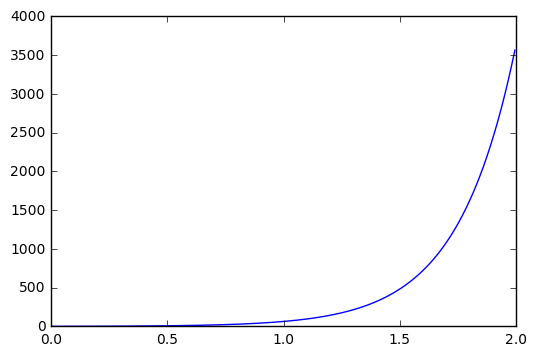

In [4]:
def backward_euler_method(equation, symbols, y0, rng, h):
    yp_sym, y_sym, t_sym = symbols
    t0, tn = rng
    
    f = sp.solve(equation, yp_sym)[0]
    
    t = np.arange(t0,tn,h)
    y = np.zeros_like(t)
    y[0] = y0
    for k in range(1, len(t)):
        ynext = sp.symbols('ynext')
        eq = sp.Eq(ynext, y[k-1] + h * f.subs([(t_sym, t[k]), (y_sym, ynext)]))
        y[k] =  sp.solve(eq, ynext)[0]

    return t, y

t_backward_euler,y_backward_euler = backward_euler_method(equation, symbols, y0, rng, h)
plt.plot(t_backward_euler, y_backward_euler, 'b')
plt.show()

#### Porównanie

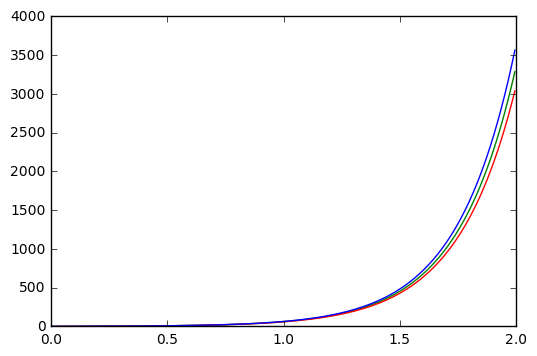

In [5]:
plt.plot(
    t_exact, y_exact, 'g',
    t_euler, y_euler, 'r',
    t_backward_euler, y_backward_euler, 'b'
    )
plt.show()